In [152]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42 # to be able to change text in pdf opened with illustrator
plt.rcParams['ps.fonttype'] = 42
#import scipy.stats as stats
from statsmodels.stats import multicomp 
from scipy import stats
import dabest

import pandas as pd
import glob

import tkinter as tk
from tkinter import filedialog#to open dialog box to choose file
from tkinter.filedialog import askopenfilename

In [153]:
# Add heka_reader to PYTHONPATH
import sys
fpath = '/Users/Fechner/PythonStuff/heka_reader'
sys.path.append(fpath)

### switch to my directory and check if I am in the correct directory

In [154]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm


/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm


## Ratio plots are a result of the Matlab script TEVCAnalyzeLoopSTFX.m found on github analyzing mean values of 3 recordings for several conditions 

https://github.com/sfechner/AnalysisFunction/tree/master/TEVC

In [155]:
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/'
filedirExportFig ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'
# filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'
# filedirManuscriptStat ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Statistics/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename

#root = tk.Tk()
#root.withdraw() not sure if necessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
#certain file
#filename = 'RatioNterm-20201026.xlsx'




In [156]:
filenameRatio = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/'

In [157]:
listofFiles = ['099','100','101','102','103','104','105','106','107','108','109','110','111']

In [158]:
df = pd.DataFrame()

for i in range(len(listofFiles)):
    df_temp = pd.read_csv(filenameRatio+'RatioDeltaTEVC-STFX'+listofFiles[i]+'.txt', sep="," )
    df = df.append(df_temp,ignore_index=True)

df.to_csv(filedir+'RatioNterm-.csv', header=True, index=None, sep=',', mode='w')    

In [159]:
# #pandas environment
# print(filename)
# xl = pd.ExcelFile(filedir+filename)
# xl.sheet_names

# df = xl.parse("Sheet1",converters={'CultivationSol': str}) #calls for Sheet names 
df['RATIO'] = pd.to_numeric(df['RATIO'], errors='coerce')
df.tail()

,Date,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev
687,겿,STFX111033,mg753mg012,L-15(300Amil),6,4.0,NaGluSel1,NaGluSelAmil300,-0.000021,-0.000001,0.000020,0.055664,-0.000978,-0.034978,-0.034000
688,겿,STFX111033,mg753mg012,L-15(300Amil),6,4.0,NaGluSelAmil300,NaGluSel2,-0.000001,-0.000013,-0.000011,10.790900,-0.034978,-0.002376,0.032602
689,겿,STFX111034,mg751mg012,L-15(300Amil),6,2.5,KGluSel1,NaGluSel1,-0.000023,-0.000031,-0.000008,1.360725,-0.010168,0.005213,0.015381
690,겿,STFX111034,mg751mg012,L-15(300Amil),6,2.5,NaGluSel1,NaGluSelAmil300,-0.000031,-0.000012,0.000019,0.376198,0.005213,-0.003841,-0.009053
691,겿,STFX111034,mg751mg012,L-15(300Amil),6,2.5,NaGluSelAmil300,NaGluSel2,-0.000012,-0.000009,0.000003,0.786438,-0.003841,-0.003122,0.000719


# common axis parameters

In [160]:
AxisTickLabelSize = 8
AxisLabelSize = 10
AxisLegendSize = 8
SizeOfMarker = 3
ErrorColor = 'red'

SizeOfMarker = 2
SizeofLine = 0.5

# Hard coding here: 
- Rename Mutations and plasmid Names
- determines which mutant to plot and in which order

In [176]:
ReNameAlanin ={'F84A':'mg738mg012',
         'K85A':'mg739mg012',
         'E86A':'mg740mg012',
         'F87A':'mg741mg012',
         'C88A':'mg748mg012',
         'Y89A':'mg759mg012',
         'K90A':'mg745mg012',
         'T91A':'mg752mg012',
         'S92A':'mg749mg012',
         'ctr A93':'mg419mg012',
         'H94A':'mg750mg012',
         'G95A':'mg746mg012',
         'I96A':'mg747mg012',
         'P97A':'mg760mg012',
         'M98A':'mg753mg012',
         'I99A':'mg761mg012',
         'G100A':'mg751mg012'      
        }

ReNameChimera={ 'ctr A93':'mg419mg012',
               'M4-NtermDT1':'mg755mg012',
               'M4d-DT1ABC':'mg733mg012',
               'M4d-DT1A':'mg734mg012',
               'M4d-DT1A':'mg734mg012',
               'M4d-DT1B':'mg735mg012',
               'M4d-DT1C':'mg742mg012',
#                 'M4+M4-DT1A':'mg419mg734mg012',
#                'M4+M4-DT1B':'mg419mg735mg012',
#                'M4+M4-DT1C':'mg419mg742mg012',
#                'DT1-NtermM4':'mg756mg012',
#                'DT1-M4ABC':'mg736mg012',
#                'DT1-M4A':'mg737mg012',
#                'DT1-M4B':'mg757mg012',
#                'DT1-M4C':'mg758mg012',
        }
#print(ReNameAlanin)
LabelAlanin = list(ReNameAlanin.keys())
LabelChimera = list(ReNameChimera.keys())

# Input for df_current for Estimation plot

In [162]:
ListofAllAlanin = ['uninjected']
for i in range(len(ReNameAlanin)):
    ListofAllAlanin.append(ReNameAlanin[LabelAlanin[i]])
#print(ListofAllAlanin)

ListofAllChimera = ['uninjected']
for i in range(len(ReNameChimera)):
    ListofAllChimera.append(ReNameChimera[LabelChimera[i]])

# Re-Arrange Data Frame with All data with Test Solution 300 uM Amil
used in the Section Quality check

In [163]:
df_Alanin300Amil = df[(df.Injection.isin(pd.unique(ListofAllAlanin))) & (df.TestSol.isin(["NaGluSelAmil300"]))] 
df_Chimera300Amil = df[(df.Injection.isin(pd.unique(ListofAllChimera))) & (df.TestSol.isin(["NaGluSelAmil300"]))]

### Re-concatenat data (problem if data are in concatenated file which are not in column file)

# Re-Arrange Before and After current all Alanin mutations

In [164]:
AllInjection =  pd.unique(ListofAllAlanin)
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique("NaGluSelAmil300")
TestSolution  = TestSolution.tolist()

df_new = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 2:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:
                df_new = pd.concat([df_new,results[element]["MeanSTART"].rename(element+"-"+Solelement).reset_index(drop=True),results[element]["MeanTEST"].rename(element+'+'+Solelement).reset_index(drop=True)],sort=False, axis=1)
            #print(len(results[element]))
        
df_newInuA_Bef_Alanine = df_new.astype(float)*1000000  
#
#print(df_newInuA["mg012-NaGluAmil300"])



# Re-Arrange Before and After current all Chimera mutations

In [165]:
AllInjection =  pd.unique(ListofAllChimera)
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique("NaGluSelAmil300")
TestSolution  = TestSolution.tolist()

df_new = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 2:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:
                df_new = pd.concat([df_new,results[element]["MeanSTART"].rename(element+"-"+Solelement).reset_index(drop=True),results[element]["MeanTEST"].rename(element+'+'+Solelement).reset_index(drop=True)],sort=False, axis=1)
            #print(len(results[element]))
        
df_newInuA_Bef_Chimera = df_new.astype(float)*1000000  
#
#print(df_newInuA["mg012-NaGluAmil300"])



# Re-Arrange Change in Current All Single Alanin Mutants

In [166]:
AllInjection =  pd.unique(ListofAllAlanin)
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique("NaGluSelAmil300")
TestSolution  = TestSolution.tolist()

df_ChangeInCur = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 1:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:          
                df_ChangeInCur = pd.concat([df_ChangeInCur,results[element]["DELTA"].rename(element+"DELTA"+Solelement).reset_index(drop=True),],sort=False, axis=1)

df_ChangeInCuruA = df_ChangeInCur.astype(float)*1000000

#print(df_ChangeInCuruA['mg753mg012DELTANaGluSelAmil300'])

# Re-Arrange Change in Current All Single Chimera Mutants

In [167]:
AllInjection =  pd.unique(ListofAllChimera)
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique("NaGluSelAmil300")
TestSolution  = TestSolution.tolist()

df_ChangeInCurAllChimera = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 1:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:          
                df_ChangeInCurAllChimera = pd.concat([df_ChangeInCurAllChimera,results[element]["DELTA"].rename(element+"DELTA"+Solelement).reset_index(drop=True),],sort=False, axis=1)

df_ChangeInCurAllChimerauA = df_ChangeInCurAllChimera.astype(float)*1000000

#print(df_ChangeInCuruA['mg753mg012DELTANaGluSelAmil300'])

# Make list of different groups for plotting 

In [168]:
FigAlaninAll = LabelAlanin
FigChimeraAll = LabelChimera

# dabest load file concatenation 

## Fig All Alanin mutants change in current compared to chaneg in current to uninjected

In [169]:
all_alanin300AmilDelta = ["uninjectedDELTANaGluSelAmil300"]

#Uninj300AmilDelta = ("uninjectedDELTANaGluSelAmil300",)
#all_alanin300AmilDelta.append(Uninj300AmilDelta)

for i in range(len(FigAlaninAll)):
    X = (ReNameAlanin[FigAlaninAll[i]]+"DELTANaGluSelAmil300")
    all_alanin300AmilDelta.append(X)

    
#print(all_alanin300AmilDelta)

#dabest load
Fig_Delta_Alanin = dabest.load(df_ChangeInCuruA, idx= (
    all_alanin300AmilDelta
))   

In [170]:
all_Chimera300AmilDelta = ["uninjectedDELTANaGluSelAmil300"]

#Uninj300AmilDelta = ("uninjectedDELTANaGluSelAmil300",)
#all_chimera300AmilDelta.append(Uninj300AmilDelta)

for i in range(len(FigChimeraAll)):
    X = (ReNameChimera[FigChimeraAll[i]]+"DELTANaGluSelAmil300")
    all_Chimera300AmilDelta.append(X)

    
#print(all_chimera300AmilDelta)

#dabest load
Fig_Delta_Chimera = dabest.load(df_ChangeInCurAllChimerauA, idx= (
    all_Chimera300AmilDelta
))   

# color code for different plots

In [171]:
colorsBefAfter = []
for i in range(50):
    colorsBefAfter.append("black")
    colorsBefAfter.append("red")
    
colorsDelta = ['black']
for i in range(50):
    colorsDelta.append("red")
    
# colorsSINGLES = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
# colorsPharma = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
# colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]
# colorsESTAll = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72)]

# paired dot plot All Singles

## alanine Singles paired dot plot

In [172]:
ListofAllAlanin[17]

'mg751mg012'

In [173]:
labels2[0]

''

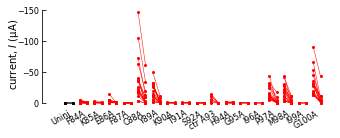

In [199]:
# import matplotlib.pyplot as plt
# import numpy as np

fig = plt.figure(figsize=(5.2, 1.9)) 

ax1 = plt.subplot(1,1,1)

#### common parameters
axesText = ''


# loop to plot paired data. Refers to List of Alanines and the before and after array
plotnr = np.array([1,2]) 
for n in range(int(len(df_newInuA_Bef_Alanine.columns)/2)):
    #print('plotting the lines')
    for i in range(len(df_newInuA_Bef_Alanine[ListofAllAlanin[n]+"-NaGluSelAmil300"])):
        ax1.plot(plotnr, [df_newInuA_Bef_Alanine[ListofAllAlanin[n]+"-NaGluSelAmil300"][i], df_newInuA_Bef_Alanine[ListofAllAlanin[n]+"+NaGluSelAmil300"][i]], c=colorsDelta[n],marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)# alpha=0.5
    plotnr = plotnr +2
    #print(plotnr)

ylimSetM4 = [0,-150]

##### AXIS 1 ####
ax1.set_ylim(ylimSetM4)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',1))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax1.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0) 
ax1.spines['bottom'].set_visible(False) 

labels2 = ['Uninj']
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])

#ax1.set_xticklabels(labels2,  ha='right',rotation=30,fontsize=AxisLegendSize)    
ax1.xaxis.set_visible(False)

n=1.9
for i in range(len(labels2)):    
    ax1.text(n, 20, labels2[i],ha='right',rotation=30,fontsize= AxisLegendSize)
    n = n+2

# plt.draw()      # Note, this line is important
# labels = [l.get_text() for l in ax1.get_yticklabels()]
# labels[0] = '0'
#ax1.set_yticklabels(labels)

#ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)
ax1.text(-6, -120.5, 'current, $\it{I}$ (µA)',fontsize=AxisLabelSize,rotation=90,ha='center')
   
plt.gcf().subplots_adjust(bottom=0.2, left=0.15,right=None, top=None,hspace=None, wspace=None)     
      
plt.savefig(filedirExportFig+"PairedDataAllAlanineSingles"+'.pdf')

## chimera singles paired dot plot

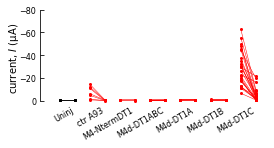

In [200]:
# import matplotlib.pyplot as plt
# import numpy as np

fig = plt.figure(figsize=(4, 2)) 

ax1 = plt.subplot(1,1,1)

#### common parameters
axesText = ''


# loop to plot paired data. Refers to List of Alanines and the before and after array
plotnr = np.array([1,2]) 
for n in range(int(len(df_newInuA_Bef_Chimera.columns)/2)):
    #print('plotting the lines')
    for i in range(len(df_newInuA_Bef_Chimera[ListofAllChimera[n]+"-NaGluSelAmil300"])):
        ax1.plot(plotnr, [df_newInuA_Bef_Chimera[ListofAllChimera[n]+"-NaGluSelAmil300"][i], df_newInuA_Bef_Chimera[ListofAllChimera[n]+"+NaGluSelAmil300"][i]], c=colorsDelta[n],marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)# alpha=0.5
    plotnr = plotnr +2


ylimSetM4 = [0,-80]

##### AXIS 1 ####
ax1.set_ylim(ylimSetM4)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',1))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax1.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0) 
# ax7.set_title('Ibuoride Analogues',size=12)
# ax1.set_xticklabels(np.unique(IbuAll30['Injection']),rotation=30)
#ax1.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1],plot5[0],plot5[1])) 
ax1.spines['bottom'].set_visible(False) 

labels2 = ['','Uninj']
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])

ax1.set_xticklabels(labels2,  ha='right',rotation=30,fontsize=AxisLegendSize)    
#a1.xaxis.set_visible(False)

# plt.draw()      # Note, this line is important
# labels = [l.get_text() for l in ax1.get_yticklabels()]
# labels[0] = '0'
#ax1.set_yticklabels(labels)

# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)
ax1.text(-2, -60.5, 'current, $\it{I}$ (µA)',fontsize=AxisLabelSize,rotation=90,ha='center')

    
plt.gcf().subplots_adjust(bottom=0.25, left=0.15,right=None, top=None,hspace=1.5, wspace=0.5)     
    
# plt.show()

plt.savefig(filedirExportFig+"PairedDataAllChimera"+'.pdf')

# plot Change in Current for Different conditions

# plot alanin delta

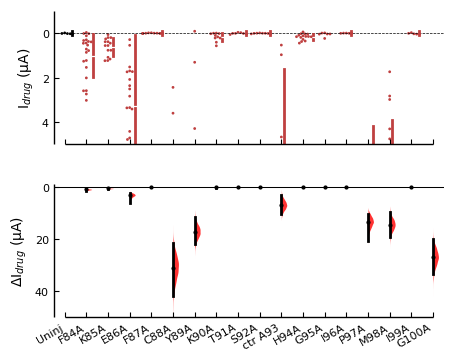

In [216]:
#plt.figure(figsize=(3.5, 3)) 
fig1= Fig_Delta_Alanin.mean_diff.plot(swarm_ylim=(5,-1), contrast_ylim=(50,-1), fig_size=(5.2, 4.5),  raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI$_{drug}$ (µA)',
                                    swarm_label='I$_{drug}$ (µA)',custom_palette=colorsDelta, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,50], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')



labels = ['','']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')

labels2 = ['Uninj']
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
                                                                                                       
#labels2 = ['',LabelAlanin[0],'','F84A','','K85A','','E86A','','F87A','','C88A','','Y89A','','K90A','','T91A','','S92A','','H94A','','G95A','','I96A','','P97A','','M98A','','I99A','','G100A']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
#plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.2, left=0.15,right=None, top=None,hspace=None, wspace=None)  
plt.savefig(filedirExportFig+"ChangeinCurrentPilotAlanin-WithOutCurrent"+'.pdf')


# plot chimera Delta All singles

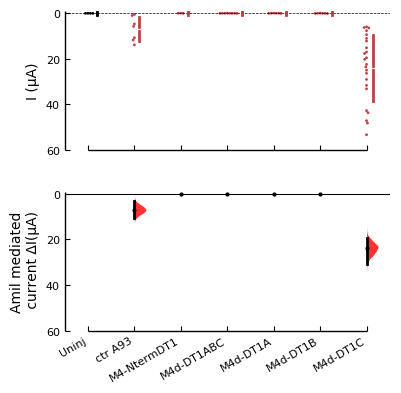

In [202]:
#plt.figure(figsize=(3.5, 3)) 
fig1= Fig_Delta_Chimera.mean_diff.plot(swarm_ylim=(60,-1), contrast_ylim=(60,-1), fig_size=(5, 4.5),  raw_marker_size=(2),es_marker_size=2,contrast_label='Amil mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',custom_palette=colorsDelta, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,50], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')



labels = ['','']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')

labels2 = ['Uninj']
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])
                                                                                                       
#labels2 = ['',LabelAlanin[0],'','F84A','','K85A','','E86A','','F87A','','C88A','','Y89A','','K90A','','T91A','','S92A','','H94A','','G95A','','I96A','','P97A','','M98A','','I99A','','G100A']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedirExportFig+"ChangeinCurrentPilotChimera"+'.pdf')


# plot chimera delta heteromeric expression

# paired dot plot

# Quality CHECK Data

# Check Some Statistics about number of Recordings etc

In [203]:
df_Alanin300Amil.pivot(columns='Injection', values='TestSol').describe().T

,count,unique,top,freq
Injection,,,,
mg419mg012,7,1,NaGluSelAmil300,7
mg738mg012,22,1,NaGluSelAmil300,22
mg739mg012,15,1,NaGluSelAmil300,15
mg740mg012,17,1,NaGluSelAmil300,17
mg741mg012,10,1,NaGluSelAmil300,10
mg745mg012,10,1,NaGluSelAmil300,10
mg746mg012,6,1,NaGluSelAmil300,6
mg747mg012,4,1,NaGluSelAmil300,4
mg748mg012,18,1,NaGluSelAmil300,18


In [ ]:
df_Chimera300Amil.pivot(columns='Injection', values='TestSol').describe().T

# Control Rating

In [ ]:
df_Alanin300Amil

In [ ]:
fig = plt.figure(figsize=(8, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = ListofAllAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = ['Uninj']
#labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
sns.swarmplot(x= df_Alanin300Amil['Injection'], y=df_Alanin300Amil['Rating'], data = df_Alanin300Amil,palette=colorsDelta, edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= df_Alanin300Amil['Injection'], y=df_Alanin300Amil['Rating'], data = df_Alanin300Amil, palette=colorsDelta,ax=ax1,order=orderCons)

YlimitPerm = [0,5]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
#ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
ax1.set_title('Quality Rating All Single Alanine Mutations',size=AxisLabelSize) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Quality Rating from 0 to 4', fontsize=AxisLabelSize)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)






plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

# plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermAlaninWithCurrent"+'.pdf')




In [ ]:
fig = plt.figure(figsize=(8, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = ListofAllChimera #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = ['Uninj']
#labels2 = []
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])
    
sns.swarmplot(x= df_Chimera300Amil['Injection'], y=df_Chimera300Amil['Rating'], data = df_Chimera300Amil,palette=colorsDelta, edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= df_Chimera300Amil['Injection'], y=df_Chimera300Amil['Rating'], data = df_Chimera300Amil, palette=colorsDelta,ax=ax1,order=orderCons)

YlimitPerm = [0,5]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
#ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=8)  
ax1.set_title('Quality Rating All Single Chimera Mutations',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Quality Rating from 0 to 4', fontsize=10)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

# plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermAlaninWithCurrent"+'.pdf')




# Control Leak

In [ ]:
fig = plt.figure(figsize=(8, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = ListofAllAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = ['Uninj']
#labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
sns.swarmplot(x= df_Alanin300Amil['Injection'], y=df_Alanin300Amil['MeanTEST']*1000000, data = df_Alanin300Amil,palette=colorsDelta, edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= df_Alanin300Amil['Injection'], y=df_Alanin300Amil['MeanTEST']*1000000, data = df_Alanin300Amil, palette=colorsDelta,ax=ax1,order=orderCons)

YlimitPerm = [1,-10]

##### AXIS 1 ####
#ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
#ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=8)  
ax1.set_title('Leak (uA)',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Leak (uA) All SIngle Alanine mutations', fontsize=10)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

# plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermAlaninWithCurrent"+'.pdf')




In [ ]:
fig = plt.figure(figsize=(8, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = ListofAllChimera #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = ['Uninj']
#labels2 = []
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])
    
sns.swarmplot(x= df_Chimera300Amil['Injection'], y=df_Chimera300Amil['MeanTEST']*1000000, data = df_Chimera300Amil,palette=colorsDelta, edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= df_Chimera300Amil['Injection'], y=df_Chimera300Amil['MeanTEST']*1000000, data = df_Chimera300Amil, palette=colorsDelta,ax=ax1,order=orderCons)

YlimitPerm = [1,-10]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
#ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=8)  
ax1.set_title('Leak (uA) All Single Chimera Mutations',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Leak (uA)', fontsize=10)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

# plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermAlaninWithCurrent"+'.pdf')


